In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob
from matplotlib.animation import FuncAnimation

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'deptht'})
area = meshmask.e1t[0] * meshmask.e2t[0]

In [3]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')

In [4]:
file_pattern = '/data/sallen/results/MEOPAR/wastewater/long_run/*feb18/SalishSea_1d_201802[0-3][0-9]_201802[0-3][0-9]_grid_T.nc'
file_list = glob.glob(file_pattern)
data28 = xr.open_mfdataset(file_list, data_vars=['outfall'])  


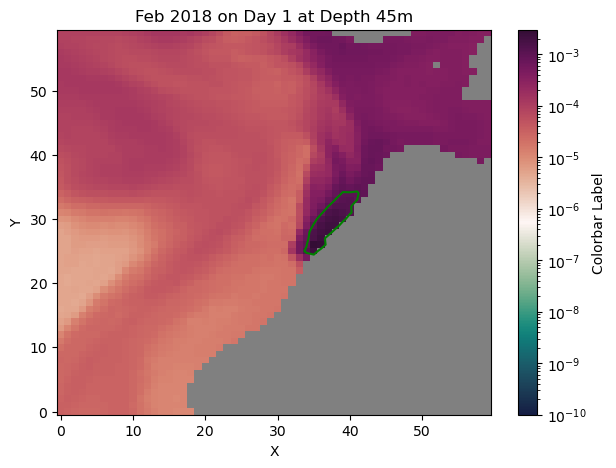

In [5]:
iz = 20
x_slice=slice(250+iz, 350-iz)
y_slice=slice(400+iz, 500-iz)
ds = data28.isel(x = x_slice, y = y_slice)
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
data = ds['outfall'].isel(time_counter=0, deptht = 23)
offset = 1e-10
norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
pc = axs.pcolormesh(data.x, data.y, data.values, norm = norm_data, cmap= cm_vel, shading='auto')
contour_value = 1e-3 
contour = axs.contour(data.x, data.y, data.values, levels=[contour_value], colors='green')
plt.colorbar(pc, ax=axs, label='Colorbar Label') 
axs.set_xlabel('X') 
axs.set_ylabel('Y') 

def update_plot(frame):
    data = ds['outfall'].isel(time_counter=frame, deptht = 23)
    pc.set_array(data.values.ravel())  
    axs.set_title(f'Feb 2018 on Day {frame + 1} at Depth 45m')
    contour_value = 1e-3 
    for c in contour.collections:
        c.remove()
    new_contour = axs.contour(data.x, data.y, data.values, levels=[contour_value], colors='green')
    contour.collections = new_contour.collections

ani = FuncAnimation(fig, update_plot, frames=28, repeat=False)
ani.save('output_animation.gif', writer='pillow')
from IPython.display import HTML
HTML(ani.to_jshtml())

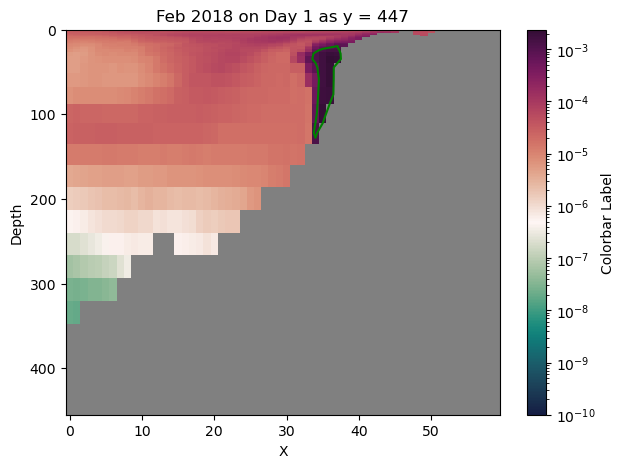

In [6]:
iz = 20
x_slice=slice(250+iz, 350-iz)
ds = data28.isel(x = x_slice)
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
data = ds['outfall'].isel(time_counter=0, y = 447)
offset = 1e-10
norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
pc = axs.pcolormesh(data.x, data.deptht, data.values, norm = norm_data, cmap= cm_vel, shading='auto')
contour_value = 1e-3 
contour = axs.contour(data.x, data.deptht, data.values, levels=[contour_value], colors='green')
plt.colorbar(pc, ax=axs, label='Colorbar Label')
axs.invert_yaxis()  
axs.set_xlabel('X') 
axs.set_ylabel('Depth') 
def update_plot(frame):
    data = ds['outfall'].isel(time_counter=frame, y = 447)
    pc.set_array(data.values.ravel())  
    axs.set_title(f'Feb 2018 on Day {frame + 1} as y = 447')

    contour_value = 1e-3 
    for c in contour.collections:
        c.remove()
    new_contour = axs.contour(data.x, data.deptht, data.values, levels=[contour_value], colors='green')
    contour.collections = new_contour.collections

ani = FuncAnimation(fig, update_plot, frames=28, repeat=False)
ani.save('output_animation.gif', writer='pillow')
from IPython.display import HTML
HTML(ani.to_jshtml())

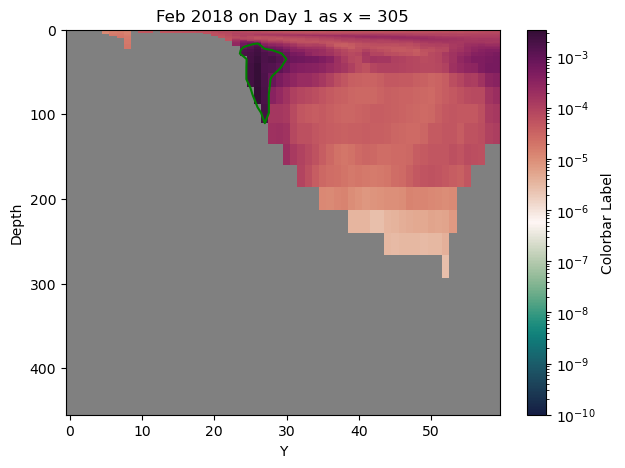

In [7]:
iz = 20
y_slice = slice(400+iz, 500-iz)
ds = data28.isel(y=y_slice)
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
data = ds['outfall'].isel(time_counter=0, x = 305)
offset = 1e-10
norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
pc = axs.pcolormesh(data.y, data.deptht, data.values, norm = norm_data, cmap= cm_vel, shading='auto')
contour_value = 1e-3 
contour = axs.contour(data.y, data.deptht, data.values, levels=[contour_value], colors='green')
plt.colorbar(pc, ax=axs, label='Colorbar Label')
axs.invert_yaxis()  
axs.set_xlabel('Y')
axs.set_ylabel('Depth') 

def update_plot(frame):
    data = ds['outfall'].isel(time_counter=frame, x=305)
    pc.set_array(data.values.ravel())  
    axs.set_title(f'Feb 2018 on Day {frame + 1} as x = 305')

    contour_value = 1e-3 
    for c in contour.collections:
        c.remove()
    new_contour = axs.contour(data.y, data.deptht, data.values, levels=[contour_value], colors='green')
    contour.collections = new_contour.collections

ani = FuncAnimation(fig, update_plot, frames=28, repeat=False)
ani.save('output_animation.gif', writer='pillow')
from IPython.display import HTML
HTML(ani.to_jshtml())